In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('mushrooms.csv')

In [6]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [7]:
dummies= pd.get_dummies(df[['cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']],drop_first=True)
df=pd.concat([df.drop(['cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat'], axis=1), dummies],axis=1) 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 96 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   class                       8124 non-null   object
 1   cap-shape_c                 8124 non-null   uint8 
 2   cap-shape_f                 8124 non-null   uint8 
 3   cap-shape_k                 8124 non-null   uint8 
 4   cap-shape_s                 8124 non-null   uint8 
 5   cap-shape_x                 8124 non-null   uint8 
 6   cap-surface_g               8124 non-null   uint8 
 7   cap-surface_s               8124 non-null   uint8 
 8   cap-surface_y               8124 non-null   uint8 
 9   cap-color_c                 8124 non-null   uint8 
 10  cap-color_e                 8124 non-null   uint8 
 11  cap-color_g                 8124 non-null   uint8 
 12  cap-color_n                 8124 non-null   uint8 
 13  cap-color_p                 8124 non-null   uint

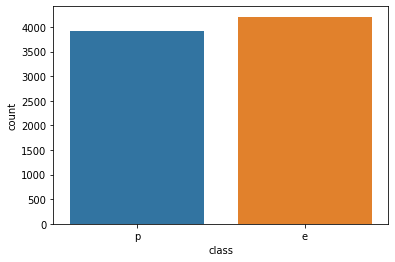

In [10]:
sns.countplot(x='class',data=df)

In [11]:
df['class'] = df['class'].map({'e':0,'p':1})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 96 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   class                       8124 non-null   int64
 1   cap-shape_c                 8124 non-null   uint8
 2   cap-shape_f                 8124 non-null   uint8
 3   cap-shape_k                 8124 non-null   uint8
 4   cap-shape_s                 8124 non-null   uint8
 5   cap-shape_x                 8124 non-null   uint8
 6   cap-surface_g               8124 non-null   uint8
 7   cap-surface_s               8124 non-null   uint8
 8   cap-surface_y               8124 non-null   uint8
 9   cap-color_c                 8124 non-null   uint8
 10  cap-color_e                 8124 non-null   uint8
 11  cap-color_g                 8124 non-null   uint8
 12  cap-color_n                 8124 non-null   uint8
 13  cap-color_p                 8124 non-null   uint8
 14  cap-colo

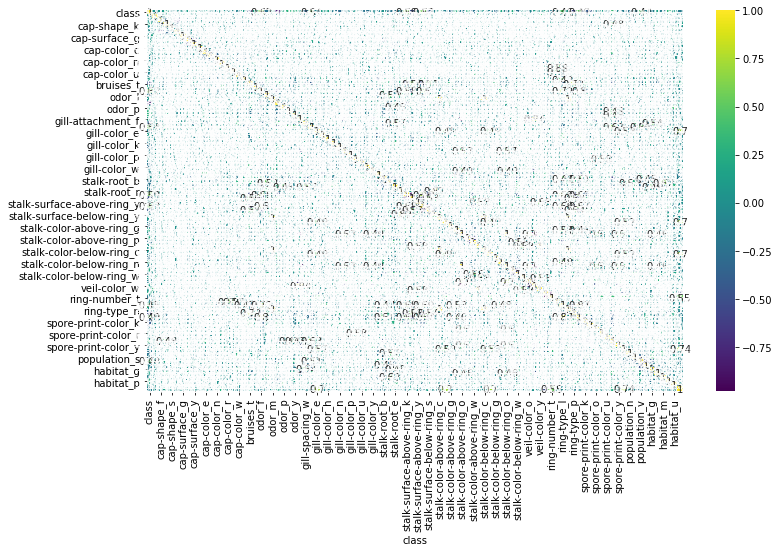

In [15]:
df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
sns.distplot(df['class'],kde=False,bins=40)

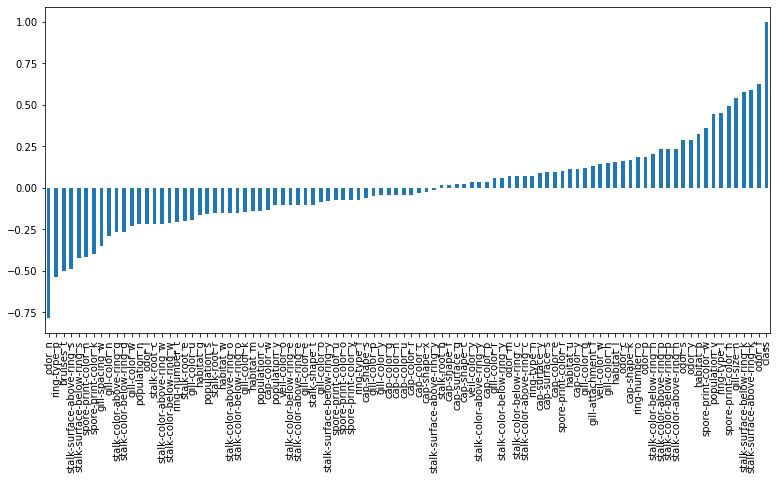

In [27]:
plt.figure(figsize=(13,6))
df.corr()['class'].sort_values().plot(kind='bar')

In [28]:
x = df.drop('class',axis=1).values
y = df['class'].values

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

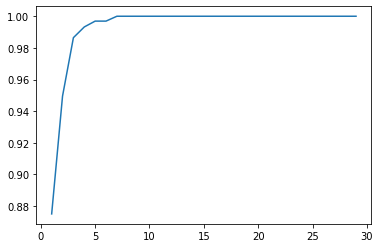

In [31]:
scores=[]
for i in range(1,30):
  tree=DecisionTreeClassifier(max_depth = i) 
  tree.fit(x_train, y_train) 
  scores.append(tree.score(x_test,y_test)) 
plt.plot(range(1,30),scores) 
plt.show()


In [35]:
tree=DecisionTreeClassifier(max_depth = 8) 
tree.fit(x_train, y_train) 
tree.score(x_test,y_test)

1.0

In [36]:
predictions = tree.predict(x_test) 
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_test,predictions)) 
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       851
           1       1.00      1.00      1.00       774

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

[[851   0]
 [  0 774]]
